<a href="https://colab.research.google.com/github/Alian-123/Machine-Learning-project/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Market Prediction Using ML**

🔹 Step 1: Install & Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf




from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

🔹 Step 2: Download Stock Market Data

In [3]:
stock_symbol = 'AAPL' # Apple stock


data = yf.download(stock_symbol, start='2015-01-01', end='2024-01-01')
data.head()

/tmp/ipython-input-3133124425.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start='2015-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.237551,24.705320,23.798600,24.694235,212818400
2015-01-05,23.554739,24.086799,23.368519,24.006990,257142000
2015-01-06,23.556965,23.816344,23.195606,23.619038,263188400
2015-01-07,23.887280,23.987040,23.654503,23.765348,160423600
2015-01-08,24.805082,24.862723,24.097885,24.215383,237458000


🔹 Step 3: Data Visualization

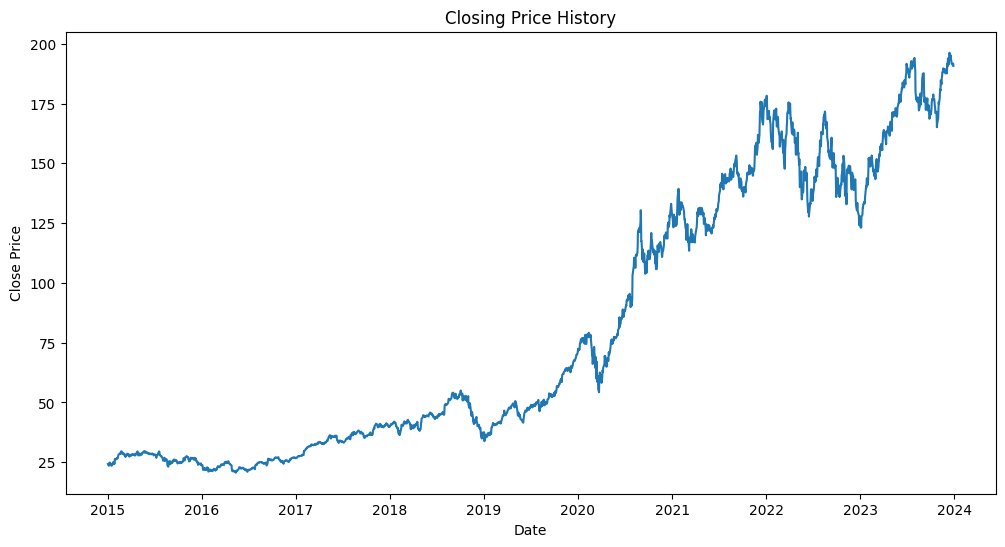

In [4]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'])
plt.title('Closing Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

🔹 Step 4: Feature Engineering

In [7]:
data['Prediction'] = data['Close'].shift(-1)
data.dropna(inplace=True)

In [8]:
X = data[['Close']]
y = data['Prediction']

In [18]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)


In [23]:
print(data.shape)
data.head()


(0, 6)


Price,Close,High,Low,Open,Volume,Prediction
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,


In [24]:
data = yf.download(stock_symbol, start='2015-01-01', end='2024-01-01')

# Create prediction column
data['Prediction'] = data['Close'].shift(-1)

# IMPORTANT: drop only last row
data = data[:-1]


/tmp/ipython-input-2489744297.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start='2015-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed




🔹 Step 5: Prepare Features & Labels

In [25]:
X = data[['Close']].values
y = data['Prediction'].values


In [26]:
print(len(X))
print(len(y))


2263
2263


🔹 Step 7: Train Machine Learning Model

In [28]:
# Step 6: Train-Test Split (Time Series Safe)


split = int(len(X) * 0.8)

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

In [29]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)



🔹 Step 7: Train Machine Learning Model

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

🔹 Step 8: Model Prediction

In [32]:
predictions = model.predict(X_test)

🔹 Step 9: Model Evaluation

In [33]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)


print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 2.090286536224593
RMSE: 2.775179002123865
R2 Score: 0.9774755817739209


🔹 Step 10: Actual vs Predicted Visualization

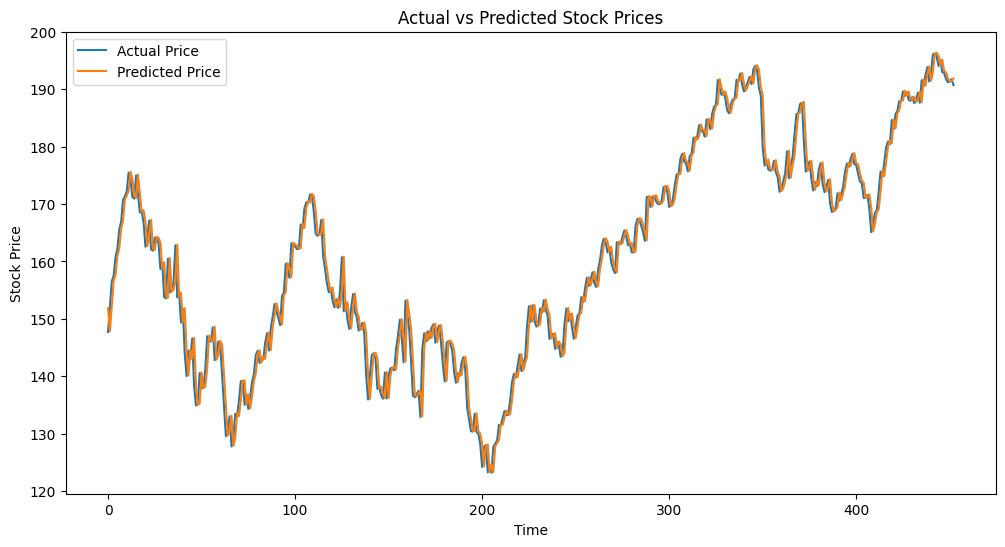

In [35]:
plt.figure(figsize=(12,6))

plt.plot(y_test, label='Actual Price')
plt.plot(predictions, label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()

plt.show()


### 🔹 Step 11: Predict Next Day Stock Price

In [37]:
# Step 11: Predict Next Day Stock Price

last_close_price = data[['Close']].iloc[-1].values.reshape(1, -1)

next_day_price = model.predict(last_close_price)

print("Predicted Next Day Close Price:", next_day_price[0])


Predicted Next Day Close Price: 191.89903793712972
